<a href="https://colab.research.google.com/github/Juliodominguezcalderon/Talento_tech/blob/main/web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**WEB Scraping**

### El Web Scraping es una técnica utilizada para extraer datos de sitios web de manera automática. Este proceso implica el uso de programas de software que envían solicitudes a páginas web, recuperan su contenido HTML, y extraen la información deseada, la cual puede ser almacenada y analizada posteriormente. Es una herramienta poderosa para recolectar grandes volúmenes de datos no estructurados que se encuentran en la web y transformarlos en datos estructurados para análisis, investigación, y diversas aplicaciones comerciales.

In [1]:
#Instalación de librerías python necesarias, si es requerido
!pip install requests
!pip install beautifulsoup4
!pip install pandas

In [37]:
#Importar librerías para extracción de datos web
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [441]:
#Sitio web de la extracción de datos
url         = "http://books.toscrape.com/"
response    = requests.get(url)
soup        = BeautifulSoup(response.content, 'html.parser')

In [51]:
print(response)

<Response [200]>


In [50]:
print(soup)

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

In [442]:
#Extraer el titulo de página web
titulo1 = soup.find('title').get_text()
print(titulo1)

titulo2 = soup.title.string
print(titulo2)


    All products | Books to Scrape - Sandbox


    All products | Books to Scrape - Sandbox



In [443]:
#recorriendo los datos y almacenandolos en una lista
books = soup.find_all('article', class_='product_pod')#accede a la etiqueta article y la clase product_pod
book_list = [] #crea una lista vacia

for book in books: #creando estructura repetitiva for
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    book_list.append({"Title": title, "Price": price})

In [444]:
#Crear el dataframe de pandas
df_books = pd.DataFrame(book_list)
print(df_books)

                                                Title   Price
0                                A Light in the Attic  £51.77
1                                  Tipping the Velvet  £53.74
2                                          Soumission  £50.10
3                                       Sharp Objects  £47.82
4               Sapiens: A Brief History of Humankind  £54.23
5                                     The Requiem Red  £22.65
6   The Dirty Little Secrets of Getting Your Dream...  £33.34
7   The Coming Woman: A Novel Based on the Life of...  £17.93
8   The Boys in the Boat: Nine Americans and Their...  £22.60
9                                     The Black Maria  £52.15
10     Starving Hearts (Triangular Trade Trilogy, #1)  £13.99
11                              Shakespeare's Sonnets  £20.66
12                                        Set Me Free  £17.46
13  Scott Pilgrim's Precious Little Life (Scott Pi...  £52.29
14                          Rip it Up and Start Again  £35.02
15  Our 

In [179]:
#convertir el valor en £ a dolares
# Cantidad en libras
amount_gbp = 51.77

# Tasa de cambio (1 GBP = 1.31 USD) 13-oct-2024
exchange_rate = 1.31

# Conversión a dólares
amount_usd = amount_gbp * exchange_rate

# Imprimimos el Resultado
print(f"£{amount_gbp} es igual a ${amount_usd:.2f} USD")

£51.77 es igual a $67.82 USD


In [177]:
df_books.dtypes

,0
Title,object


In [181]:
# Elimina el símbolo de la moneda y convierte a float
df_books['Price'] = df_books['Price'].str.replace('£', '').astype(float)

# convierte todos los valores de la columna Price a dolares y adicionamos la columna
df_books['Price (USD)'] = df_books['Price'] * exchange_rate

# Renombramos la columna Price
df_books = df_books.rename(columns={'Price': 'Price (GBP)'})

In [184]:
df_books.head()

,Title,Price (GBP),Price (USD)
0,A Light in the Attic,51.77,67.8187
1,Tipping the Velvet,53.74,70.3994
2,Soumission,50.10,65.6310
3,Sharp Objects,47.82,62.6442
4,Sapiens: A Brief History of Humankind,54.23,71.0413


In [185]:
# Se redondea el precio en dolares
df_books['Price (USD)'] = df_books['Price (USD)'].round(2)
df_books.head()

,Title,Price (GBP),Price (USD)
0,A Light in the Attic,51.77,67.82
1,Tipping the Velvet,53.74,70.40
2,Soumission,50.10,65.63
3,Sharp Objects,47.82,62.64
4,Sapiens: A Brief History of Humankind,54.23,71.04


In [188]:
#Se guarda el resultado en .csv, queda en el folder temporal del drive
df_books.to_csv('books.csv', index=False)


In [186]:
#Se realiza visualización de los datos con la librería plotly
import plotly.express as px

fig = px.bar(df_books, x='Title', y='Price (USD)', title='Book Prices')
fig.show()

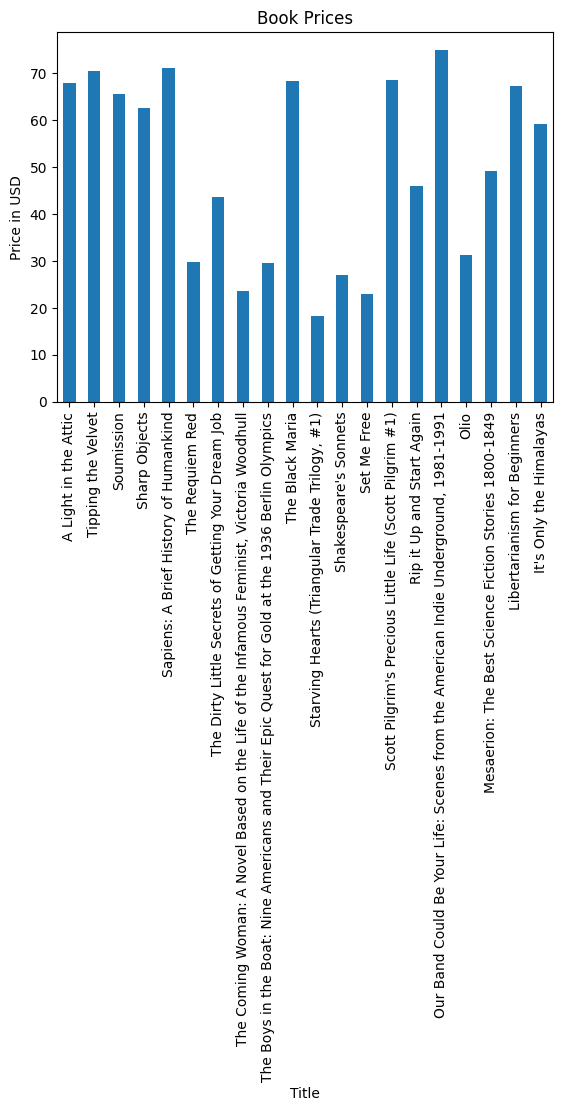

In [203]:
#Se realiza visualización de los datos con la librería matplotlib
import matplotlib.pyplot as plt

df_books.plot(kind='bar', x='Title', y='Price (USD)', legend=False)
plt.ylabel('Price in USD')
plt.title('Book Prices')
plt.xticks(rotation=90)
plt.show()

In [509]:
url         = "http://books.toscrape.com/"
response    = requests.get(url)
soup        = BeautifulSoup(response.content, 'html.parser')
print(url)

http://books.toscrape.com/


In [510]:
print(soup)

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

In [511]:
#Extraer el titulo de página web

Texto_páginas = soup.find('li', class_='current').get_text() #Obtenemos la cadena de texto para conocer la página que noe encontramos navegando
Texto_páginas = Texto_páginas.strip() #limpiamos los espacios en blanco de la cadena de texto
print(Texto_páginas)
Hallar_texto = Texto_páginas.find('Page')
Páginas = Texto_páginas[Hallar_texto+4:].strip()
print(Páginas)

Espacio = Páginas.find(' ')
print(Espacio)

Num_of= Espacio = Páginas.find('of')
print(Num_of)

Num_pag = Páginas[:Espacio].strip()
Next_pag = int(Num_pag)+1
print(Num_pag)
print(Next_pag)

Max_pag = Páginas[-Num_of:]
print(Max_pag)

Url_pag = url + 'catalogue/page-'+ str(Next_pag)+'.html'
print(Url_pag)


Page 1 of 50
1 of 50
1
2
1
2
50
http://books.toscrape.com/catalogue/page-2.html


In [512]:
url         = Url_pag
response    = requests.get(url)
soup        = BeautifulSoup(response.content, 'html.parser')
print(url)

http://books.toscrape.com/catalogue/page-2.html


In [513]:
Texto_páginas = soup.find('li', class_='current').get_text() #Obtenemos la cadena de texto para conocer la página que noe encontramos navegando
Texto_páginas = Texto_páginas.strip() #limpiamos los espacios en blanco de la cadena de texto
print(Texto_páginas)
Hallar_texto = Texto_páginas.find('Page')
Páginas = Texto_páginas[Hallar_texto+4:].strip()
print(Páginas)

Espacio = Páginas.find(' ')
print(Espacio)

Num_of= Espacio = Páginas.find('of')
print(Num_of)

Num_pag = Páginas[:Espacio].strip()
Next_pag = int(Num_pag)+1
print(Num_pag)
print(Next_pag)

Max_pag = Páginas[-Num_of:]
print(Max_pag)

Url_pag = url + 'catalogue/page-'+ str(Next_pag)+'.html'
print(Url_pag)


Page 2 of 50
2 of 50
1
2
2
3
50
http://books.toscrape.com/catalogue/page-2.htmlcatalogue/page-3.html


In [455]:
books2 = soup.find_all('article', class_='product_pod')#accede a la etiqueta article y la clase product_pod
book2_list = [] #crea una lista vacia

for book2 in books2: #creando estructura repetitiva for
    title = book2.h3.a['title']
    price = book2.find('p', class_='price_color').text
    book2_list.append({"Title": title, "Price": price})


[{'Title': 'A Light in the Attic', 'Price': '£51.77'},
 {'Title': 'Tipping the Velvet', 'Price': '£53.74'},
 {'Title': 'Soumission', 'Price': '£50.10'},
 {'Title': 'Sharp Objects', 'Price': '£47.82'},
 {'Title': 'Sapiens: A Brief History of Humankind', 'Price': '£54.23'},
 {'Title': 'The Requiem Red', 'Price': '£22.65'},
 {'Title': 'The Dirty Little Secrets of Getting Your Dream Job',
  'Price': '£33.34'},
 {'Title': 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'Price': '£17.93'},
 {'Title': 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'Price': '£22.60'},
 {'Title': 'The Black Maria', 'Price': '£52.15'},
 {'Title': 'Starving Hearts (Triangular Trade Trilogy, #1)',
  'Price': '£13.99'},
 {'Title': "Shakespeare's Sonnets", 'Price': '£20.66'},
 {'Title': 'Set Me Free', 'Price': '£17.46'},
 {'Title': "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Price': '£52.29'},
 {'Title

# Otros ejemplos de páginas para hacer web scraping

In [ ]:
url = 'https://www.bbc.com/sport'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
headlines = soup.find_all(class_='ssrcss-1mhwnz8-Promo e1vyq2e80')
news_list = [headline.get_text() for headline in headlines]
print(news_list)

In [ ]:
news_df = pd.DataFrame(news_list, columns=['Headline'])
news_df.head()